### LIBRARIES

In [4]:
import pandas as pd
import numpy
import requests
import io
import tweepy
import json
import time
import urllib
import sqlite3
import matplotlib.pyplot as plt

### Step 1: Data Gathering

In [5]:
#read the data into a pandas DataFrame
twitter_archive_enhanced = pd.read_csv ('twitter-archive-enhanced.csv')

# Opening the .csv File
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 2. Downloading The tweet image predictions programatically.

In [6]:

import requests
import pandas as pd

r = requests.get ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open ('image_predictions.tsv', 'wb') . write(r.content)

####reading the .tsv file into Project through pandas

image_predictions = pd.read_csv ('image_predictions.tsv', sep = '\t')

# Opening the .tsv file

image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# I was not able to connect directly to Twitter’s API.
# Instead, I'm reading a saved JSON file of tweets (tweet-json.txt).

In [7]:
import pandas as pd
import json

cols = ['id', 'retweet_count', 'favorite_count']
tweet_data = []  # to collect each tweet’s summary

with open('tweet_json.txt', encoding='latin-1') as f:
    for line in f:
        record = json.loads(line)
        # build a simple dict with the three fields of interest
        summary = {
            'id': record['id'],
            'retweet_count': record['retweet_count'],
            'favorite_count': record['favorite_count']
        }
        tweet_data.append(summary)

# Convert our list of summaries into a DataFrame
tweet_json = pd.DataFrame(tweet_data)

tweet_json


,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


# Step 2: Assessing Data

### COPIES

In [8]:
#datasets_copies
twitter_archive_enhanced_cleaned = twitter_archive_enhanced.copy()
image_predictions_cleaned = image_predictions.copy()
tweets_data_cleaned = tweet_json.copy()

### ASSESSING

In [9]:
#basic info about datasets
#FILE NO.1
twitter_archive_enhanced_cleaned.info()
twitter_archive_enhanced_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
#FILE NO. 2
image_predictions_cleaned.info()
image_predictions_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
#FILE NO. 3
tweets_data_cleaned.info()
tweets_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


##### PROGRAMATIC ASSESSMENTS TESTS

In [12]:
twitter_archive_enhanced_cleaned.source.value_counts()
# non-informant strings. need to extract source description. quality issue registered.

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.tweet_id.isnull()].head()
# no empty values in tweet_id. Check made for future consolidation across datasources. No issue detected.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
x = list(twitter_archive_enhanced_cleaned.tweet_id)
y = list(image_predictions_cleaned.tweet_id)

z = []
for tweet in x:
    if x not in y:
        z.append(x)
x

# tweet ids without image identified. As per project requirements they should be removed. quality issue registered.


[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [15]:
twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.retweeted_status_id.notnull()]
#retweets identified. As per project requirements they should be removed. quality issue registered.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [16]:
twitter_archive_enhanced_cleaned.info()
#retweets are not taken into consideration, therefore retweets related columns should be removed. quality issue registered.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
a = twitter_archive_enhanced_cleaned.name.value_counts().to_frame()
a.head(30)
#entries like: 'a','an','the' are not proper dog names. quality issue registered.

,name
None,745
a,55
Charlie,12
Cooper,11
Oliver,11
Lucy,11
Tucker,10
Lola,10
Penny,10
Bo,9


In [18]:
a = twitter_archive_enhanced_cleaned[['rating_numerator','rating_denominator']].drop_duplicates()
a.head(45)
#suspicious numerators and denominators identified

,rating_numerator,rating_denominator
0,13,10
2,12,10
9,14,10
45,5,10
55,17,10
62,11,10
113,10,10
188,420,10
189,666,10
229,6,10


In [19]:
pd.options.display.max_colwidth = 1000
a= twitter_archive_enhanced_cleaned[['rating_numerator','rating_denominator','text']] \
    [(twitter_archive_enhanced_cleaned.rating_numerator > 100) | (twitter_archive_enhanced_cleaned.rating_numerator < 10)]
a.head(30)
#identified instances incorrectly extracted decimal numerators and incorrect extract in case of multiple scores. quality issue registered.

,rating_numerator,rating_denominator,text
45,5,10,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
188,420,10,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189,666,10,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
229,6,10,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1"
290,182,10,@markhoppus 182/10
313,960,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
315,0,10,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
387,7,10,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating"
462,7,10,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
485,9,10,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…


In [20]:
image_predictions_cleaned[image_predictions_cleaned.tweet_id.isnull()].head()
# no empty values in tweet_id. Check made for future consolidation across datasources. No issue detected.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
x = twitter_archive_enhanced_cleaned[['doggo','floofer','pupper','puppo']].drop_duplicates()
x.head(30)
#dog stage should be wrapped into single column as 4 of them represent the same information. tidyness issue registered. 
#in some rows there are multiple dog stages. quality issue registered.

,doggo,floofer,pupper,puppo
0,None,None,None,None
9,doggo,None,None,None
12,None,None,None,puppo
29,None,None,pupper,None
46,None,floofer,None,None
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None


In [22]:
image_predictions_cleaned.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [23]:
image_predictions_cleaned.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
chow                               20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [24]:
image_predictions_cleaned.p3.value_counts()

#The p1, p2, and p3 columns contain incorrect breed entries and should be combined into a single column.
# There is inconsistency in the capitalization of dog breed names—some are in lowercase, others in uppercase. 
# A uniform format should be applied across all records.
# These observations represent two quality issues and one tidiness issue.

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

###### IDENTIFIED ISSUES SUMMARY

#### QUALITY

### FILE NO.1: twitter_archive_enhanced_cleaned

1.1 The source column contains extra text that should be removed to provide clearer, more concise information.

1.2 Retain only tweets that include images and ensure their IDs match those found in FILE NO.2 (image_predictions_cleaned).

1.3 Eliminate all retweets from the dataset.

1.4 Remove columns associated with retweets, as they are no longer necessary.

1.5 The name column contains some invalid or incorrect entries.

1.6 For certain rows, the numerator and denominator values have been extracted incorrectly and need correction.

### FILE NO.2: image_predictions_cleaned

2.1 The p1, p2, and p3 columns have inaccurate breed predictions that need to be addressed.

2.2 Inconsistencies exist in the capitalization of dog breed names. A standardized format should be applied throughout the dataset.

### FILE NO.3: tweets_data_cleaned

No issues identified.

#### TIDYNESS

# FILE NO.1: twitter_archive_enhanced_cleaned

1.1 The dog stages are currently spread across multiple columns; they should be consolidated into a single column.

1.2 All three datasets should be merged into one, as they all reference the same entity using tweet_id.

# FILE NO.2: image_predictions_cleaned

2.1 The prediction-related columns should be reshaped into three main columns, with a fourth column indicating the prediction rank (e.g., first, second, or third).

# FILE NO.3: tweets_data_cleaned

No tidiness issues detected.

### CLEANING

# TIDINESS
2.1 All prediction-related columns should be reshaped into three unified columns, accompanied by a fourth column indicating the prediction level (e.g., p1, p2, p3).

# DEFINE:
This transformation can be achieved by using the pandas equivalent of a SQL UNION ALL operation repeated three times—once for each prediction level.

However, while this method works well for a small number of prediction levels, it's not scalable. A more elegant and efficient solution would be to use the pandas.melt() function to reshape the DataFrame in a cleaner and more dynamic way.

In [25]:
# CODE

image_predictions_cleaned_temp_1 = image_predictions_cleaned.copy()
image_predictions_cleaned_temp_2 = image_predictions_cleaned.copy()
image_predictions_cleaned_temp_3 = image_predictions_cleaned.copy()

image_predictions_cleaned_temp_1['prediction_number'] = 1
image_predictions_cleaned_temp_2['prediction_number'] = 2
image_predictions_cleaned_temp_3['prediction_number'] = 3

image_predictions_cleaned_temp_1 = image_predictions_cleaned_temp_1.drop(columns = ['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])  
image_predictions_cleaned_temp_2 = image_predictions_cleaned_temp_2.drop(columns = ['p1','p1_conf','p1_dog','p3','p3_conf','p3_dog'])
image_predictions_cleaned_temp_3 = image_predictions_cleaned_temp_3.drop(columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog']) 

image_predictions_cleaned_temp_1.rename(columns = {
                            'p1' : 'prediction', 
                            'p1_conf' : 'prediction_confidence',
                            'p1_dog' : 'prediction_is_dog_breed'} , inplace = True)

image_predictions_cleaned_temp_2.rename(columns = {
                            'p2' : 'prediction', 
                            'p2_conf' : 'prediction_confidence',
                            'p2_dog' : 'prediction_is_dog_breed'} , inplace = True)

image_predictions_cleaned_temp_3.rename(columns = {
                            'p3' : 'prediction', 
                            'p3_conf' : 'prediction_confidence',
                            'p3_dog' : 'prediction_is_dog_breed'} , inplace = True)

image_predictions_cleaned = pd.concat([image_predictions_cleaned_temp_1,image_predictions_cleaned_temp_2,image_predictions_cleaned_temp_3])
image_predictions_cleaned = image_predictions_cleaned.drop(columns = 'prediction_number')

# TEST

In [26]:
image_predictions_cleaned.info()
image_predictions_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id                   6225 non-null int64
jpg_url                    6225 non-null object
img_num                    6225 non-null int64
prediction                 6225 non-null object
prediction_confidence      6225 non-null float64
prediction_is_dog_breed    6225 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 297.9+ KB


,tweet_id,jpg_url,img_num,prediction,prediction_confidence,prediction_is_dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### 1.1 Dog stages should be consolidated into a single column, as they are currently spread across four separate columns.
#### DEFINE:
Create a new column by concatenating the existing four dog stage columns.
Then, clean this combined column by extracting valid stage names using the str.extract() function along with regular expressions.
If multiple stages are present in a single record, retain them and separate them with a comma.
Finally, drop the original four dog stage columns to complete the tidiness transformation.

### Code

In [27]:
twitter_archive_enhanced_cleaned['growth_stage'] = (twitter_archive_enhanced_cleaned.doggo 
                                                + ',' + twitter_archive_enhanced_cleaned.floofer
                                                + ',' + twitter_archive_enhanced_cleaned.pupper
                                                + ',' + twitter_archive_enhanced_cleaned.puppo)

twitter_archive_enhanced_cleaned['growth_stage'] = twitter_archive_enhanced_cleaned['growth_stage'].str.replace('None,','')
twitter_archive_enhanced_cleaned['growth_stage'] = twitter_archive_enhanced_cleaned['growth_stage'].str.replace(',None','')
twitter_archive_enhanced_cleaned['growth_stage'] = twitter_archive_enhanced_cleaned['growth_stage'].str.replace('None','')
twitter_archive_enhanced_cleaned['growth_stage'] = twitter_archive_enhanced_cleaned['growth_stage'].str.strip()

twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(columns = ['doggo','floofer','pupper','puppo'])

### TEST

In [28]:
twitter_archive_enhanced_cleaned['growth_stage'].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: growth_stage, dtype: int64

#### 1.2 All three datasets should be merged into a single dataset, as they all describe the same entity: the tweet_id.

### DEFINE:

The missing columns retweet_count and favorite_count from the tweets_data_cleaned file are merged into twitter_archive_enhanced_cleaned using a left join on tweet_id. After the merge, any duplicate tweet_id columns are removed. Since the join operation may change the data type of the newly added columns to float, their types are explicitly converted back to int.

The image_predictions_cleaned file is then merged into the dataset using an inner join on tweet_id. This ensures that only tweets containing images are retained, effectively addressing quality issue 1.2, which required filtering to include only tweets with images.

### CODE

In [29]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.merge(tweets_data_cleaned, 
                                                                          how='left', 
                                                                          left_on = 'tweet_id',
                                                                          right_on = 'id')

twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(columns = 'id')

twitter_archive_enhanced_cleaned.favorite_count = twitter_archive_enhanced_cleaned.favorite_count.values.astype(numpy.int64)
twitter_archive_enhanced_cleaned.retweet_count = twitter_archive_enhanced_cleaned.retweet_count.values.astype(numpy.int64)

twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.merge(image_predictions_cleaned, 
                                                                          how='inner', 
                                                                          left_on = 'tweet_id',
                                                                          right_on = 'tweet_id')


### TEST

In [30]:
twitter_archive_enhanced_cleaned.info()
twitter_archive_enhanced_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 21 columns):
tweet_id                      6225 non-null int64
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     6225 non-null object
source                        6225 non-null object
text                          6225 non-null object
retweeted_status_id           243 non-null float64
retweeted_status_user_id      243 non-null float64
retweeted_status_timestamp    243 non-null object
expanded_urls                 6225 non-null object
rating_numerator              6225 non-null int64
rating_denominator            6225 non-null int64
name                          6225 non-null object
growth_stage                  6225 non-null object
favorite_count                6225 non-null int64
retweet_count                 6225 non-null int64
jpg_url                       6225 non-null object
img_num                       6225

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,growth_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,prediction_confidence,prediction_is_dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,0.085851,False
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,0.076110,False
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10,Tilly,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10,Tilly,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Pekinese,0.090647,True


#### DATASET COPIES BACKUP
BACKUP IN THE MIDDLE OF THE RUN SO THERE IS NO NEED TO RUN WHOLE PROJECT WHEN TROUBLESHOOTING

In [31]:
#dataset_copies
twitter_archive_enhanced_cleaned_bk = twitter_archive_enhanced_cleaned.copy()
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned_bk.copy()

#### QUALITY
###### 1.1 The source column contains unnecessary text that should be stripped to retain only the relevant information.
#### DEFINE:
Apply the str.extract() function with a regular expression to isolate and extract the meaningful part of the source text (e.g., the display name or platform name), 
removing any surrounding HTML tags or extra formatting.

### CODE

In [32]:
twitter_archive_enhanced_cleaned['source'] = twitter_archive_enhanced_cleaned['source'].str.extract(
                                                    '.*(Vine|iPhone|Twitter Web Client|TweetDeck).*',expand=True)

## TEST

In [33]:
twitter_archive_enhanced_cleaned.source.value_counts()

iPhone                6102
Twitter Web Client      90
TweetDeck               33
Name: source, dtype: int64

###### Retain only tweets that contain images. A matching tweet_id must exist in FILE NO.2 (image_predictions_cleaned).

DEFINE:
This issue is addressed during the resolution of the related tidiness issue, 
where an inner join with image_predictions_cleaned ensures only tweets with associated images are kept.

In [34]:
# Test
tweets_with_images = image_predictions_cleaned.tweet_id
tweets_with_images = tweets_with_images.drop_duplicates()
tweets_with_images = list(tweets_with_images)

twitter_archive_enhanced_cleaned[~twitter_archive_enhanced_cleaned.tweet_id.isin(tweets_with_images)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,growth_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,prediction_confidence,prediction_is_dog_breed


###### 1.3 Retweets should be removed using the retweeted_status_id column.
DEFINE:
Filter the dataset to retain only rows where the retweeted_status_id column is null, 
thereby excluding all retweets from the data.

## CODE

In [35]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.retweeted_status_id.isnull()]

In [36]:
# Test
twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,growth_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,prediction_confidence,prediction_is_dog_breed


###### 1.4 Drop columns related to retweets.
DEFINE:
Since retweets have been excluded from the dataset, the associated columns (e.g., retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) are no longer needed. 
Remove them using the drop() function.

In [37]:
# CODE
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [38]:
# Test
twitter_archive_enhanced_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 6224
Data columns (total 18 columns):
tweet_id                   5982 non-null int64
in_reply_to_status_id      69 non-null float64
in_reply_to_user_id        69 non-null float64
timestamp                  5982 non-null object
source                     5982 non-null object
text                       5982 non-null object
expanded_urls              5982 non-null object
rating_numerator           5982 non-null int64
rating_denominator         5982 non-null int64
name                       5982 non-null object
growth_stage               5982 non-null object
favorite_count             5982 non-null int64
retweet_count              5982 non-null int64
jpg_url                    5982 non-null object
img_num                    5982 non-null int64
prediction                 5982 non-null object
prediction_confidence      5982 non-null float64
prediction_is_dog_breed    5982 non-null bool
dtypes: bool(1), float64(3), int64(6),

###### 1.5 The name column contains invalid entries.
DEFINE:
Some values in the name column are clearly incorrect—many begin with lowercase letters, indicating they were likely misparsed and should be replaced with NaN.
Additionally, although the value "None" could theoretically be a valid dog name, it appears far too frequently to be plausible and is also treated as invalid.

To address this, an auxiliary column was created. The valid dog names were extracted using the str.extract() function with a regular expression. 
The result was saved as a new column named dog_name.

In [39]:
# CODE
twitter_archive_enhanced_cleaned.name = twitter_archive_enhanced_cleaned.name.replace(['None'],numpy.nan)

twitter_archive_enhanced_cleaned['dog_name'] = twitter_archive_enhanced_cleaned.name.str.extract('([A-Z].*)')

twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(columns = 'name')


In [40]:
# TEST
twitter_archive_enhanced_cleaned.dog_name.value_counts()

Charlie     33
Oliver      30
Cooper      30
Lucy        30
Tucker      27
Penny       27
Winston     24
Sadie       24
Lola        21
Toby        21
Daisy       21
Bella       18
Stanley     18
Jax         18
Bo          18
Koda        18
Oscar       15
Louis       15
Chester     15
Leo         15
Bailey      15
Scout       15
Rusty       15
Buddy       15
Milo        15
Dave        15
Gary        12
Reggie      12
Jerry       12
Scooter     12
            ..
Astrid       3
Stewie       3
Ace          3
Superpup     3
Joshwa       3
Bungalo      3
Eriq         3
Emanuel      3
JD           3
Ginger       3
Keet         3
Keurig       3
Goliath      3
Shawwn       3
Miguel       3
Kayla        3
Binky        3
Champ        3
Iggy         3
Clarkus      3
Fizz         3
Tayzie       3
Lillie       3
Holly        3
Tilly        3
Nugget       3
Lilly        3
Snoopy       3
Chesney      3
Nigel        3
Name: dog_name, Length: 913, dtype: int64

###### 1.6 Correct the extraction of rating_numerator and rating_denominator from the text column.
DEFINE:

1. Remove the existing rating_numerator and rating_denominator columns, as they contain incorrect values.

2. Create a temporary column by extracting properly formatted ratings (e.g., 11/10) from the text field using a regular expression.

3. From this temporary column, generate new rating_numerator and rating_denominator columns with accurate values.

4. Drop the temporary column after successful extraction.

5. Cast both rating_numerator and rating_denominator to float type to accommodate non-integer values present in some tweets.


In [41]:
# CODE
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(columns = ['rating_numerator','rating_denominator'])

twitter_archive_enhanced_cleaned['rating_extract'] = twitter_archive_enhanced_cleaned.text.str.extract(r'([0-9]+\.?[0-9]*/[0-9]+)(?!.*[0-9]+\.?[0-9]*/[0-9]+.*)')

twitter_archive_enhanced_cleaned['rating_numerator'] = twitter_archive_enhanced_cleaned.rating_extract.str.extract(r'([0-9]+\.?[0-9]*)(?=/)')
twitter_archive_enhanced_cleaned['rating_denominator'] = twitter_archive_enhanced_cleaned.rating_extract.str.extract(r'([0-9]+\.?[0-9]*$)')

twitter_archive_enhanced_cleaned['rating_numerator'] = twitter_archive_enhanced_cleaned['rating_numerator'].values.astype(numpy.double)
twitter_archive_enhanced_cleaned['rating_denominator'] = twitter_archive_enhanced_cleaned['rating_denominator'].values.astype(numpy.double)

twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(columns = ['rating_extract'])

In [42]:
# TEST
#testing non-standard ratings 
twitter_archive_enhanced_cleaned[['text','rating_numerator','rating_denominator']] \
    [(twitter_archive_enhanced_cleaned.rating_numerator > 20) | \
     (twitter_archive_enhanced_cleaned.rating_denominator != 10) | \
     (twitter_archive_enhanced_cleaned.rating_numerator == 9.75)].drop_duplicates().head(100)


,text,rating_numerator,rating_denominator
1038,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.00,70.0
1248,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.00,7.0
1677,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
2208,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.00,150.0
2412,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.00,10.0
2778,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.00,170.0
3072,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.00,90.0
3147,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.00,80.0
3201,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.00,50.0
3399,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.00,50.0


###### 2.1 The p1, p2, and p3 columns contain invalid entries.
DEFINE:
Use the prediction_is_dog_breed column to filter out records where the predictions are not valid dog breeds.
Only keep rows where this column is True.
Once filtering is complete, drop the prediction_is_dog_breed column, as it is no longer needed.

In [43]:
# CODE
twitter_archive_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 6224
Data columns (total 18 columns):
tweet_id                   5982 non-null int64
in_reply_to_status_id      69 non-null float64
in_reply_to_user_id        69 non-null float64
timestamp                  5982 non-null object
source                     5982 non-null object
text                       5982 non-null object
expanded_urls              5982 non-null object
growth_stage               5982 non-null object
favorite_count             5982 non-null int64
retweet_count              5982 non-null int64
jpg_url                    5982 non-null object
img_num                    5982 non-null int64
prediction                 5982 non-null object
prediction_confidence      5982 non-null float64
prediction_is_dog_breed    5982 non-null bool
dog_name                   4050 non-null object
rating_numerator           5982 non-null float64
rating_denominator         5982 non-null float64
dtypes: bool(1), float64(5), int64

In [44]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.prediction_is_dog_breed == True]
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(columns = 'prediction_is_dog_breed')

In [45]:
# TEST
twitter_archive_enhanced_cleaned.info()
twitter_archive_enhanced_cleaned.head()
twitter_archive_enhanced_cleaned.prediction.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 3 to 6224
Data columns (total 17 columns):
tweet_id                 4418 non-null int64
in_reply_to_status_id    44 non-null float64
in_reply_to_user_id      44 non-null float64
timestamp                4418 non-null object
source                   4418 non-null object
text                     4418 non-null object
expanded_urls            4418 non-null object
growth_stage             4418 non-null object
favorite_count           4418 non-null int64
retweet_count            4418 non-null int64
jpg_url                  4418 non-null object
img_num                  4418 non-null int64
prediction               4418 non-null object
prediction_confidence    4418 non-null float64
dog_name                 3125 non-null object
rating_numerator         4418 non-null float64
rating_denominator       4418 non-null float64
dtypes: float64(5), int64(4), object(8)
memory usage: 621.3+ KB


golden_retriever                  267
Labrador_retriever                267
Chihuahua                         179
Pembroke                          139
Cardigan                          112
Pomeranian                        104
toy_poodle                        103
pug                                92
chow                               92
French_bulldog                     90
cocker_spaniel                     88
Chesapeake_Bay_retriever           87
Eskimo_dog                         81
beagle                             75
Siberian_husky                     72
kuvasz                             71
Staffordshire_bullterrier          67
malamute                           66
Samoyed                            66
Pekinese                           62
kelpie                             59
miniature_pinscher                 56
American_Staffordshire_terrier     56
Great_Pyrenees                     54
miniature_poodle                   53
Italian_greyhound                  49
collie      

###### 2.2 Inconsistent casing in dog breed names across the p1, p2, and p3 columns.
DEFINE:
Standardize all dog breed names to proper case, where only the first letter is capitalized. This can be achieved using the str.
capitalize() function on each of the prediction columns (p1, p2, p3).

In [46]:
# Code
twitter_archive_enhanced_cleaned.prediction = twitter_archive_enhanced_cleaned.prediction.str.capitalize()

In [47]:
# test
twitter_archive_enhanced_cleaned.prediction.value_counts()

Golden_retriever                  267
Labrador_retriever                267
Chihuahua                         179
Pembroke                          139
Cardigan                          112
Pomeranian                        104
Toy_poodle                        103
Chow                               92
Pug                                92
French_bulldog                     90
Cocker_spaniel                     88
Chesapeake_bay_retriever           87
Eskimo_dog                         81
Beagle                             75
Siberian_husky                     72
Kuvasz                             71
Staffordshire_bullterrier          67
Samoyed                            66
Malamute                           66
Pekinese                           62
Kelpie                             59
Miniature_pinscher                 56
American_staffordshire_terrier     56
Great_pyrenees                     54
Miniature_poodle                   53
Collie                             49
Italian_grey

#### FINAL DATASET

In [48]:
twitter_archive_enhanced_cleaned

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,growth_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,prediction_confidence,dog_name,rating_numerator,rating_denominator
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,Tilly,13.0,10.0
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Pekinese,0.090647,Tilly,13.0,10.0
5,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Papillon,0.068957,Tilly,13.0,10.0
6,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,Archie,12.0,10.0
7,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Malamute,0.078253,Archie,12.0,10.0
8,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Kelpie,0.031379,Archie,12.0,10.0
10,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,Darla,13.0,10.0
12,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,Franklin,12.0,10.0
13,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,English_springer,0.225770,Franklin,12.0,10.0
14,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.

#### STORING the cleaned version INTO master CSV file 

In [49]:
twitter_archive_enhanced_cleaned.to_csv('twitter_archive_master.csv')

In [50]:
conn = sqlite3.connect('weratedogs_twitter_data.db')
cur = conn.cursor()

cur.execute('CREATE TABLE IF NOT EXISTS twitter_archive_master \
(tweet_id,\
 in_reply_to_status_id,\
 in_reply_to_user_id,\
 creation_timestamp,\
 source,\
 text,\
 expanded_urls,\
 rating_numerator,\
 rating_denominator,\
 growth_stage,\
 favorite_count,\
 retweet_count,\
 dog_name,\
 jpg_url,\
 img_num,\
 prediction,\
 prediction_confidence)')
conn.commit()

twitter_archive_enhanced_cleaned.to_sql('twitter_archive_master', conn, if_exists='replace', index = False)

#### INSIGHTS

### MAKING COPIES OF FINAL DATASETS

In [51]:
#dataset_copies
twitter_archive_enhanced_cleaned_bk2 = twitter_archive_enhanced_cleaned.copy()

In [52]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned_bk2.copy()

## DATASET PREPARATION
Creating a subset from twitter_archive_enhanced_cleaned

### Goal:
Extract only the top prediction for each tweet_id, and retain records with a rating denominator equal to 10 to exclude non-standard ratings.

### Steps:

Filter the dataset to include only rows where rating_denominator == 10.

Join with prediction data to retain only the top prediction (p1) for each tweet_id.

Keep relevant columns for analysis (e.g., tweet_id, text, rating_numerator, p1, etc.).

In [53]:
insights_dataset = twitter_archive_enhanced_cleaned.drop_duplicates()
insights_dataset.reset_index(inplace = True)
insights_dataset = insights_dataset.sort_values(['tweet_id','prediction_confidence'], ascending = [True,False])

insights_dataset['rn'] = insights_dataset.groupby(["tweet_id"]).cumcount() + 1

insights_dataset = insights_dataset[insights_dataset.rn == 1]

In [54]:
insights_dataset = insights_dataset[insights_dataset.rating_denominator == 10]
insights_dataset = insights_dataset \
    .drop(columns=['in_reply_to_status_id','in_reply_to_user_id','expanded_urls','rating_denominator','rn']) \
    .drop_duplicates()

In [55]:
#ADDING DATE COLUMNS
insights_dataset['timestamp'] = pd.to_datetime(insights_dataset['timestamp'], errors='coerce')

insights_dataset['creation_month'] = insights_dataset['timestamp'].dt.month
insights_dataset['creation_year'] = insights_dataset['timestamp'].dt.year

#### INSIGHT 1: IS RATING HIGHER WHEN THE BREED CAN BE EASILY IDENTIFIED?

In [56]:
insights_1_df = insights_dataset[['prediction_confidence','rating_numerator']]
insights_1_df = insights_1_df.rename(columns = {'rating_numerator' : 'rating'})
insights_1_df['prediction_confidence'] = insights_1_df['prediction_confidence'].round(1)

In [57]:
insights_1_df = insights_1_df.groupby('prediction_confidence').mean().reset_index()

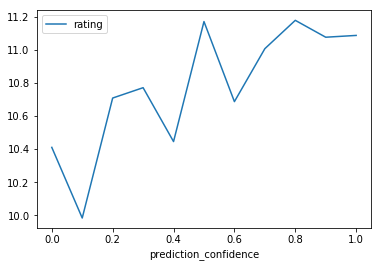

In [58]:
insights_1_df.plot(x = 'prediction_confidence')

In [59]:
insights_1_df

,prediction_confidence,rating
0,0.0,10.410959
1,0.1,9.984733
2,0.2,10.708661
3,0.3,10.771084
4,0.4,10.445965
5,0.5,11.170118
6,0.6,10.687075
7,0.7,11.006494
8,0.8,11.177515
9,0.9,11.075659


### RESULT: THE MORE OBVIOUS BREED, THE HIGHER RATING

## INSIGHT 2: ARE RATINGS HIGHER WHEN DOG HAS A NAME? 

In [60]:
insights_2_df = insights_dataset[['dog_name','rating_numerator']].reset_index()
insights_2_df['dog_has_name'] = numpy.where(insights_2_df['dog_name'].isnull(), 'no', 'yes')
insights_2_df = insights_2_df[['rating_numerator','dog_has_name']]
insights_2_df = insights_2_df.groupby('dog_has_name').mean().rename(columns = {'rating_numerator' : 'rating'}).reset_index()

In [61]:
insights_2_df

,dog_has_name,rating
0,no,10.703402
1,yes,10.867218


### RESULT: Admins give slighlty higher ratings for dogs having name. The difference however looks insignificant.

## INSIGHT 3: ARE RATINGS HIGHER IN PARTICULAR MONTHS?

In [62]:
insights_3_df = insights_dataset[['creation_month','rating_numerator']]

In [63]:
insights_3_df = insights_3_df.groupby('creation_month').mean().rename(columns = {'rating_numerator' : 'rating'})

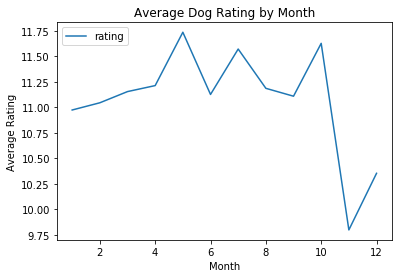

In [64]:
import matplotlib.pyplot as plt

insights_3_df.plot()
plt.xlabel('Month')        # <-- Set x-axis label here
plt.ylabel('Average Rating')  # Optional, for clarity
plt.title('Average Dog Rating by Month')  # Optional, for clarity
plt.show()


### RESULT: In average admins give lower rates at the end of the year (November & December).

## INSIGHT 4: IF RATING IS HIGH, DOES IT HAVE HIGH RETWEET_COUNT AND FAVORITE_COUNT?

In [65]:
insights_4_df = insights_dataset[['rating_numerator','retweet_count','favorite_count']]

#excluding error numbers existing due to data types conversion
insights_4_df = insights_4_df[(insights_4_df.retweet_count != -9223372036854775808) & (insights_4_df.favorite_count != -9223372036854775808)]

#calculating aggregates
insights_4_df_temp = insights_4_df.groupby('rating_numerator').size().to_frame('count').reset_index()
insights_4_df = insights_4_df.groupby('rating_numerator').mean()
insights_4_df = insights_4_df.merge(insights_4_df_temp, on='rating_numerator')

#excluding groups with less than 10 tweets
insights_4_df = insights_4_df[insights_4_df['count'] > 10].reset_index()

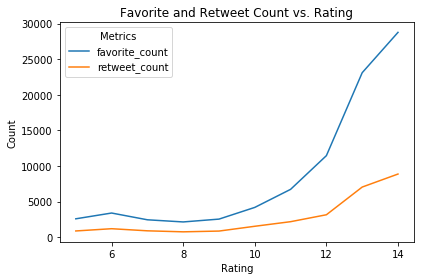

In [66]:
import matplotlib.pyplot as plt

# Plot favorite and retweet counts against rating_numerator
insights_4_df.plot(x='rating_numerator', y=['favorite_count', 'retweet_count'])

# Set labels and title with matplotlib
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Favorite and Retweet Count vs. Rating')
plt.legend(title='Metrics')  # Optional: adds a title to the legend
plt.tight_layout()
plt.show()


In [67]:
insights_4_df

,index,rating_numerator,retweet_count,favorite_count,count
0,5,5.0,862.416667,2570.750000,12
1,6,6.0,1178.500000,3382.312500,16
2,7,7.0,882.575758,2431.909091,33
3,8,8.0,740.366197,2130.084507,71
4,9,9.0,847.469697,2528.181818,132
5,11,10.0,1521.129944,4173.265537,354
6,12,11.0,2165.537815,6711.462185,357
7,15,12.0,3139.494090,11448.356974,423
8,16,13.0,7032.260870,23103.182609,230
9,18,14.0,8862.708333,28772.416667,24


## RESULT: In general, the better rating the higher number of retweets and favorites